<a href="https://colab.research.google.com/github/TheSeems/HseNotebooks/blob/main/Akhundov_calculus_8_2020_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import Symbol, diff, solve, nsolve, solveset, latex, S, simplify, fraction, Union, Interval, intersection, limit
from sympy.calculus.util import continuous_domain
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import pi as Pi
%matplotlib inline

## Занятие 8
## Математический анализ
## Дифференцирование функции, заданной параметрически
Пусть зависимость $y$ от $x$ задана параметрически:
$$
\left\{
\begin{matrix}
x = \varphi(t)\\
y = \psi(t)
\end{matrix}
\right.
$$
тогда производная $y$ по $x$  находится по формуле
$$
y'_x = \frac{y'_t}{x'_t} = \frac{\psi'_t}{\varphi'_t}
$$
Вторая производная:
$$
y''_{xx} = \frac{x'_t y''_{tt}-x''_{tt}y'_t}{(x'_t)^3}  = \frac{\varphi'_t \psi''_{tt}-\varphi''_{tt}\psi'_t}{(\varphi'_t)^3}
$$
### Задание 1
Найти производные 1 и 2 порядка функции 
$$
\left\{
\begin{matrix}
x = \sin(t) - t\cos(t)\\
y = \cos(t) + t\sin(t)
\end{matrix}
\right.
$$

In [10]:
t = Symbol('t')
x = Sin(t) - t*Cos(t)
y = Cos(t) + t*Sin(t)

dx = diff(x, t)
dy = diff(y, t)
dy_x = simplify(dy/dx)

dy2_xx = simplify((dx*diff(y, t, 2) - diff(x, t, 2)*dy)/dx**3)

display(dy_x, dy2_xx)

1/tan(t)

-1/(t*sin(t)**3)

### Задание 2.
Найти нули производных первого и второго порядка, а также точки, в которых эти производные не существуют, для функции
$$
\left\{
\begin{matrix}
x = t^2 - 2t\\
y = t^2 + 2t
\end{matrix}
\right.
$$

In [12]:
x = t**2 - 2*t
y = t**2 + 2*t

dx = diff(x, t)
dy = diff(y, t)
dy_x = simplify(dy/dx)
dy2_xx = simplify((dx*diff(y, t, 2) - diff(x, t, 2)*dy)/dx**3)
display(dy_x, dy2_xx)

dy_x_num, dy_x_den = simplify(fraction(dy_x))

dy_x_num_nul = solveset(dy_x_num)
dy_x_den_nul = solveset(dy_x_den)
display('Первая производная, нули числителя:', dy_x_num_nul, 'нули знаменателя:', dy_x_den_nul)

dy2_xx_num,dy2_xx_den = fraction(dy2_xx)
dy2_xx_num_nul = solveset(dy2_xx_num)
dy2_xx_den_nul = solveset(dy2_xx_den)
display('Вторая производная, нули числителя:', dy2_xx_num_nul, 'нули знаменателя:', dy2_xx_den_nul)

(t + 1)/(t - 1)

-1/(t - 1)**3

'Первая производная, нули числителя:'

FiniteSet(-1)

'нули знаменателя:'

FiniteSet(1)

'Вторая производная, нули числителя:'

EmptySet

'нули знаменателя:'

FiniteSet(1)

### Задание 3. 
Найти точки экстремума и точки перегиба функции Задания 2.

In [5]:
def extrem(x, y, step=0.00001):
  maxi = []
  mini = []

  dx = diff(x, t)
  dy = diff(y, t)
  dy_x = dy/dx

  for ti in list(solveset(dy_x)):
    leftie = dy_x.subs(t, ti - step)
    rightie = dy_x.subs(t, ti + step)

    left_side = x.subs(t, ti - step)
    right_side = x.subs(t, ti + step)

    if ((leftie < 0 and rightie > 0 and left_side < right_side) or (leftie > 0 and rightie < 0 and left_side > right_side)):
      mini.append(x.subs(t, ti))

    if ((leftie > 0 and rightie < 0 and left_side < right_side) or (leftie < 0 and rightie > 0 and left_side > right_side)):
      maxi.append(x.subs(t, ti))

  return maxi, mini

def inflect(x, y, step=0.00001):
  pts = []
  dx = diff(x, t)
  dy = diff(y, t)
  dy_x = dy/dx
  dy2_x = simplify((dx*diff(y, t, 2) - diff(x, t, 2)*dy)/dx**3)

  for ti in list(solveset(dy2_x)):
    left_side = dy2_x.subs(t, ti - step)
    right_side = dy2_x.subs(t, ti + step)

    if left_side != right_side:
      pts.append(x.subs(t, ti))
  
  return pts


maxi, mini = extrem(x, y)
infli = inflect(x, y)

display('Maximum', maxi)
display('Minimum', mini)
display('Inflection points', infli)

'Maximum'

[]

'Minimum'

[3]

'Inflection points'

[]

### Задание 4. Точки перегиба
Найти точки перегиба функции, график строить не нужно. 
$$
\left\{
\begin{matrix}
x = e^t\\
y = te^{2t}
\end{matrix}
\right.
$$

In [8]:
x = sympy.exp(t)
y = t * sympy.exp(2 * t)

display('Inflection points', inflect(x, y))

'Inflection points'

[exp(-3/2)]

## Асимптоты параметрически заданной функции
Пусть зависимость $y$ от $x$ задана параметрически:
$$
\left\{
\begin{matrix}
x = \varphi(t)\\
y = \psi(t)
\end{matrix}
\right.
$$
Сначала нужно определить, нет ли таких значений параметра $t$, при которых одна из функций $\varphi(t)$ или $\psi(t)$ обращается в бесконечность, а другая остается конечной. При $\varphi(t_0) = \infty$, а $\psi(t_0) = c$ кривая имеет горизонтальную асимптоту  $y = c$. При  $\psi(t_0) = \infty$, а $\varphi(t_0) = c$ кривая имеет вертикальную асимптоту $x = c$. 

Если $\varphi(t_0) = \psi(t_0) = \infty$ и 
$$
\lim_{t\to t_0} \frac{\psi(t)}{\varphi(t)} = k;\qquad \lim_{t\to t_0} [\psi(t) - k\varphi(t)] = b,
$$
то   кривая имеет наклонную асимптоту  $y = kx + b$. 

### Индивидуальное задание.
Найти асимптоты параметрически заданной функции и изобразить на графике функцию и ее асимптоты.

Вариант 4

Найти асимптоты функции, заданной параметрически, изобразить на графике функцию и ее асимптоты разными цветами.

$x = \sqrt{4 t + 6}$

$y = 2 + 3 / t$

y = 2
x = sqrt(6)


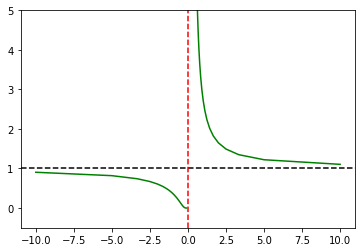

In [68]:
x = sympy.sqrt(4 * t + 6)
y = 2 + 3 / t

# t -> oo
k1 = limit(y / x, t, sympy.oo)
b1 = limit(y - k1 * x, t, sympy.oo)

print('y =', b1) # horizontal assymp.

b2 = limit(x, t, 0) # vertical assymp.
print('x =', b2)

import matplotlib.pyplot as plt

T1 = np.linspace(-10, -0.1, 100)
T2 = np.linspace(0.1, 10, 100)
for T in [T1, T2]:
  plt.plot(1/T, np.exp(T), color='green')

plt.axhline(y=1, color='black', linestyle='--')
plt.axvline(x=0, color='red', linestyle='--')
plt.ylim(-0.5, 5)

plt.show()